# In this project, you will learn practically how to choose the best features that affect Chance of Admit  using Data analysis & data visualization and then using these features in multi linear regression model .

We will go through 5 tasks to implement our project:

              Task 1: Importing libraries and Exploring the Dataset.
              Task 2: Checking missing values .
              Task 3:  analyze the data.
              Task 4: Creating visual methods to analyze the data.
              Task 5: make linear regression model

# Task 1: Importing libraries and Exploring the Dataset.

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy.stats as stats
sns.set() #setting the default seaborn style for our plots
%matplotlib inline

In [31]:
#importing the dataset
student_df=pd.read_csv("Admission_Predict.csv")
#checking the head of the data
student_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
#Info about the data shape of data, type of individual columns

student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Expected output:

1-The data should consist of 500 data record with 9 attributes. 5 integer type, 4 float type .

2- no missing data

In [33]:
student_df.drop('Serial No.',axis=1,inplace=True)
student_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# Task 2: Checking missing values 

In [34]:
# check the missing data after removing the all NAN.
student_df.isna().apply(pd.value_counts)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
False,500,500,500,500,500,500,500,500


# Task 3:  analyze the data.

In [35]:
student_df.describe() # make general statistic over view

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Output should include this Analysis:

                    1- mean of GRE score are 316 and TEFL Score are 107 and CGPA are 8.57  and chance of Admit are 72%
                      
                    2- 75% from from the student have 112 at TOEFL Score and 325 at GRE Score and 82% from them are accepted


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A05D3248B0>,
      dtype=object)

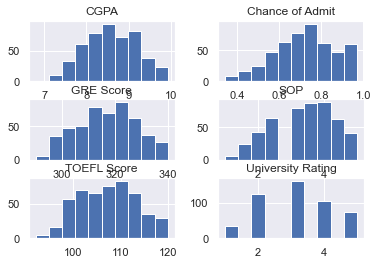

In [36]:
student_df[['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Chance of Admit'
]].hist()

#  Task 4: Creating visual methods to analyze the data.

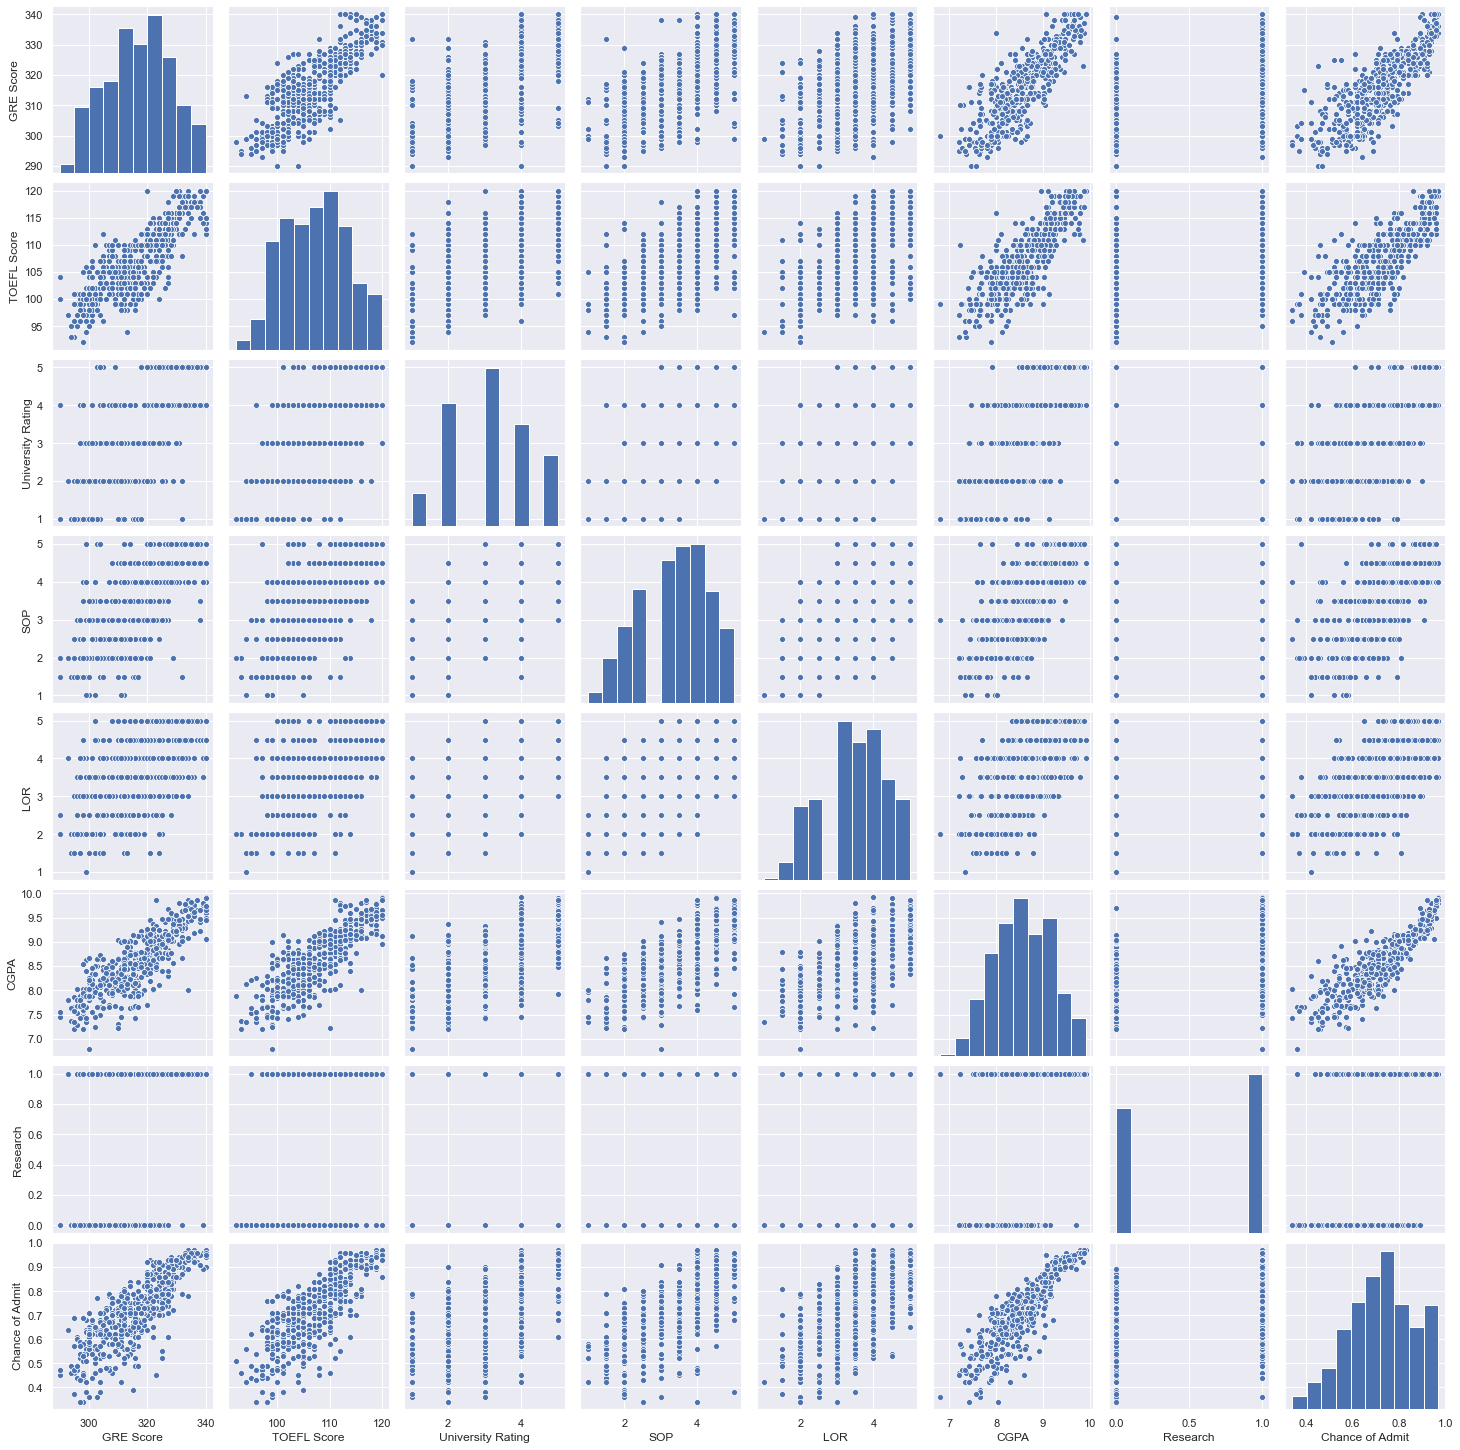

In [37]:
sns.pairplot(student_df)  #pairplot


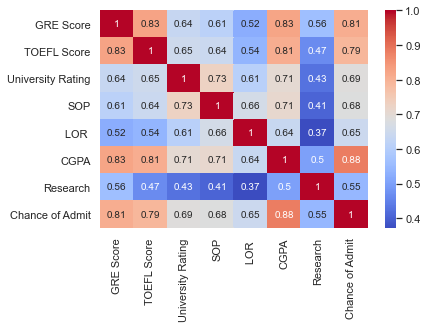

In [38]:
# show the correlation in heatmap.
sns.heatmap(student_df.corr(),cmap ='coolwarm',annot=True)

we will choose (TOEFL Score) and(GRE Score), (CGPA) , SOP, LOR , CGPA and Research due to this corrolation

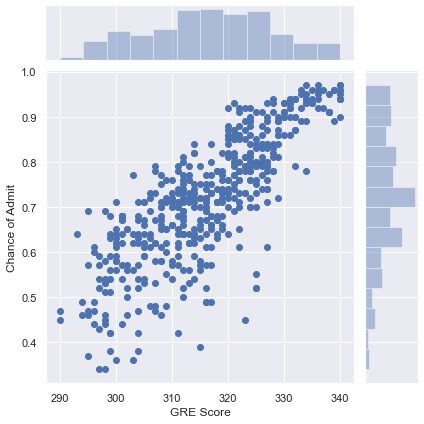

In [39]:
sns.jointplot(x='GRE Score',y='Chance of Admit',data=student_df,kind='scatter')

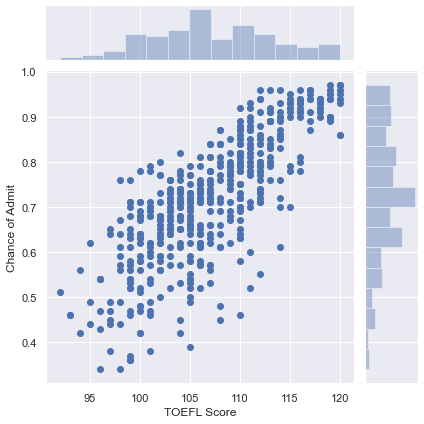

In [40]:
sns.jointplot(x='TOEFL Score',y='Chance of Admit',data=student_df,kind='scatter')

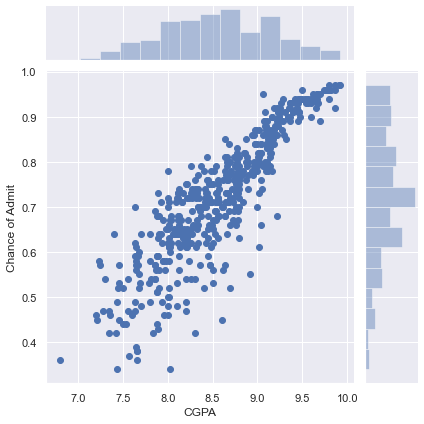

In [41]:
sns.jointplot(x='CGPA',y='Chance of Admit',data=student_df,kind='scatter')

# #Task 5: make linear regression model

In [42]:
X=student_df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA","Research"]].values

Y=student_df['Chance of Admit'].values
Y


array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [44]:
#scaling the feature vector
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [46]:
Y_pred = regressor.predict(X_test)# Predicting the Test set results


In [48]:
#Validation
from sklearn import metrics
print("r2_score:",metrics.r2_score(Y_pred,Y_test)*100,'%')

r2_score: 82.08643842953133 %


# linear regression model with r2 score = 82%